In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import librosa as lr
import matplotlib.pyplot as plt
import pylab
import librosa.display
import importlib
import utils

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Recovery of data as dataframes

In [37]:
df_train = pd.read_csv("train.csv", "|")
df_test = pd.read_csv("test.csv", "|")

In [38]:
df_train.head()

,soundName,personName,TRN/TST,soundPath,wrdPath,phnPath,txtPath,gender,region,age,recordDate,birthDate,height,race,education,prompt,start,end
0,sa1,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SA1.wav,TIMIT/TRAIN/DR6/MABC0/SA1.wrd,TIMIT/TRAIN/DR6/MABC0/SA1.phn,TIMIT/TRAIN/DR6/MABC0/SA1.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,She had your dark suit in greasy wash water all,0,43418
1,sa2,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SA2.wav,TIMIT/TRAIN/DR6/MABC0/SA2.wrd,TIMIT/TRAIN/DR6/MABC0/SA2.phn,TIMIT/TRAIN/DR6/MABC0/SA2.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,Don't ask me to carry an oily rag like,0,35840
2,sx331,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX331.wav,TIMIT/TRAIN/DR6/MABC0/SX331.wrd,TIMIT/TRAIN/DR6/MABC0/SX331.phn,TIMIT/TRAIN/DR6/MABC0/SX331.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,The big dog loved to chew on the old rag,0,39322
3,sx61,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX61.wav,TIMIT/TRAIN/DR6/MABC0/SX61.wrd,TIMIT/TRAIN/DR6/MABC0/SX61.phn,TIMIT/TRAIN/DR6/MABC0/SX61.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,Chocolate and roses never fail as a romantic,0,39936
4,sx241,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX241.wav,TIMIT/TRAIN/DR6/MABC0/SX241.wrd,TIMIT/TRAIN/DR6/MABC0/SX241.phn,TIMIT/TRAIN/DR6/MABC0/SX241.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,The hallway opens into a huge,0,31949


# Data visualization

In [39]:
print("Shape of training data : ", df_train.shape)
print("Shape of testing data  : ", df_test.shape)

Shape of training data :  (4620, 18)
Shape of testing data  :  (1680, 18)


In [40]:
df_train = df_train.drop(['personName','soundName','txtPath','phnPath','wrdPath','TRN/TST','age','recordDate','birthDate','race','height','gender','education','prompt','start','end'], axis = 1)
df_test = df_test.drop(['personName','soundName','txtPath','phnPath','wrdPath','TRN/TST','age','recordDate','birthDate','race','height','gender','education','prompt','start','end'], axis = 1)

In [41]:
df_train.head()

,soundPath,region
0,TIMIT/TRAIN/DR6/MABC0/SA1.wav,New York City
1,TIMIT/TRAIN/DR6/MABC0/SA2.wav,New York City
2,TIMIT/TRAIN/DR6/MABC0/SX331.wav,New York City
3,TIMIT/TRAIN/DR6/MABC0/SX61.wav,New York City
4,TIMIT/TRAIN/DR6/MABC0/SX241.wav,New York City


In [42]:
df_train.region.unique()
df_train.region.value_counts()

Western                     770
North Midland               760
Northern                    760
Southern                    700
South Midland               680
New England                 380
New York City               350
Army Brat (moved around)    220
Name: region, dtype: int64

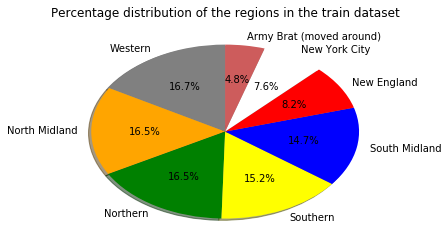

Western                     770
North Midland               760
Northern                    760
Southern                    700
South Midland               680
New England                 380
New York City               350
Army Brat (moved around)    220
Name: region, dtype: int64

In [43]:
type = df_train.region.value_counts()
labels = (np.array(type.index))
sizes = (np.array((type / type.sum())*100))
colors = ['grey', 'orange', 'green', 'yellow', 'blue', 'red', 'white', 'indianred']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the regions in the train dataset")
plt.show()

df_train.region.value_counts()

Western                     770
North Midland               760
Northern                    760
Southern                    700
South Midland               680
New England                 380
New York City               350
Army Brat (moved around)    220
Name: region, dtype: int64

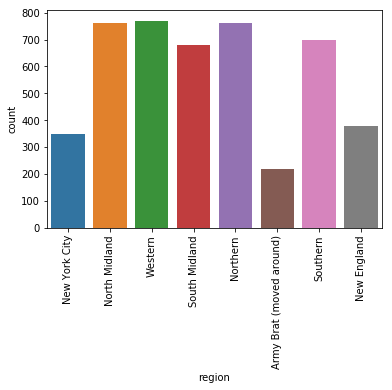

In [49]:
p = sns.countplot(df_train['region'],label="Count")
_ = plt.setp(p.get_xticklabels(), rotation=90)
df_train.region.value_counts()

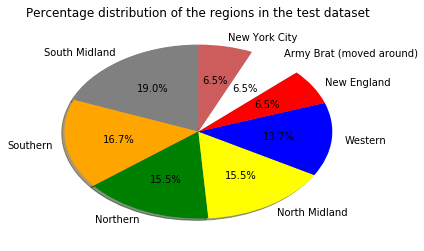

South Midland               320
Southern                    280
Northern                    260
North Midland               260
Western                     230
New England                 110
Army Brat (moved around)    110
New York City               110
Name: region, dtype: int64

In [9]:
type = df_test.region.value_counts()
labels = (np.array(type.index))
sizes = (np.array((type / type.sum())*100))
colors = ['grey', 'orange', 'green', 'yellow', 'blue', 'red', 'white', 'indianred']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the regions in the test dataset")
plt.show()

df_test.region.value_counts()

South Midland               320
Southern                    280
Northern                    260
North Midland               260
Western                     230
New England                 110
Army Brat (moved around)    110
New York City               110
Name: region, dtype: int64

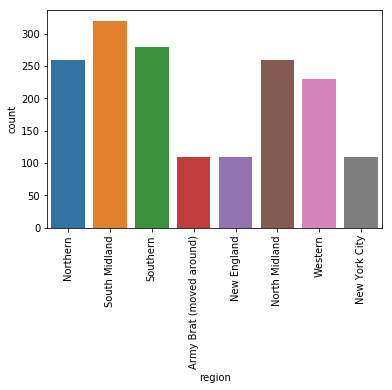

In [50]:
p = sns.countplot(df_test['region'],label="Count")
_ = plt.setp(p.get_xticklabels(), rotation=90)
df_test.region.value_counts()

# Extracting audio files

In [10]:
train_audio_list = df_train.soundPath.tolist()
test_audio_list = df_test.soundPath.tolist()

In [11]:
train_temp_features = []
test_temp_features = []

for elt in train_audio_list:
    train_temp_features.append(utils.extract_features(elt))

for elt in test_audio_list:
    test_temp_features.append(utils.extract_features(elt))

# Preparation of train and test data

df_train['region'] = df_train.region.map({'South Midland':0, 'Southern':1, 'North Midland':2, 'Northern':3, 'Western':4, 'New York City':5, 'New England':6, 'Army Brat (moved around)':7})
df_test['region'] = df_test.region.map({'South Midland':0, 'Southern':1, 'North Midland':2, 'Northern':3, 'Western':4, 'New York City':5, 'New England':6, 'Army Brat (moved around)':7})

In [12]:
df_train = pd.get_dummies(data=df_train, columns=['region'])
df_test = pd.get_dummies(data=df_test, columns=['region'])

In [13]:
df_train.head()

,soundPath,region_Army Brat (moved around),region_New England,region_New York City,region_North Midland,region_Northern,region_South Midland,region_Southern,region_Western
0,TIMIT/TRAIN/DR6/MABC0/SA1.wav,0,0,1,0,0,0,0,0
1,TIMIT/TRAIN/DR6/MABC0/SA2.wav,0,0,1,0,0,0,0,0
2,TIMIT/TRAIN/DR6/MABC0/SX331.wav,0,0,1,0,0,0,0,0
3,TIMIT/TRAIN/DR6/MABC0/SX61.wav,0,0,1,0,0,0,0,0
4,TIMIT/TRAIN/DR6/MABC0/SX241.wav,0,0,1,0,0,0,0,0


In [14]:
df_test.head()

,soundPath,region_Army Brat (moved around),region_New England,region_New York City,region_North Midland,region_Northern,region_South Midland,region_Southern,region_Western
0,TIMIT/TEST/DR2/MABW0/SA1.wav,0,0,0,0,1,0,0,0
1,TIMIT/TEST/DR2/MABW0/SA2.wav,0,0,0,0,1,0,0,0
2,TIMIT/TEST/DR2/MABW0/SX134.wav,0,0,0,0,1,0,0,0
3,TIMIT/TEST/DR2/MABW0/SX314.wav,0,0,0,0,1,0,0,0
4,TIMIT/TEST/DR2/MABW0/SX44.wav,0,0,0,0,1,0,0,0


In [27]:
X_train = np.array(train_temp_features)
y_train = np.array(df_train.drop(['soundPath'], axis=1))
X_test = np.array(test_temp_features)
y_test= np.array(df_test.drop(['soundPath'], axis=1))

In [28]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
classifier = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Train on 4620 samples, validate on 1680 samples
Epoch 1/100
4620/4620 [==============================] - 0s 59us/step - loss: 2.0073 - acc: 0.1667 - val_loss: 2.0139 - val_acc: 0.1369
Epoch 2/100
4620/4620 [==============================] - 0s 56us/step - loss: 2.0071 - acc: 0.1621 - val_loss: 2.0141 - val_acc: 0.1369
Epoch 3/100
4620/4620 [==============================] - 0s 56us/step - loss: 2.0068 - acc: 0.1667 - val_loss: 2.0142 - val_acc: 0.1369
Epoch 4/100
4620/4620 [==============================] - 0s 58us/step - loss: 2.0068 - acc: 0.1623 - val_loss: 2.0142 - val_acc: 0.1369
Epoch 5/100
4620/4620 [==============================] - 0s 54us/step - loss: 2.0066 - acc: 0.1667 - val_loss: 2.0142 - val_acc: 0.1369
Epoch 6/100
4620/4620 [==============================] - 0s 57us/step - loss: 2.0066 - acc: 0.1667 - val_loss: 2.0145 - val_acc: 0.1369
Epoch 7/100
4620/4620 [==============================] - 0s 65us/step - loss: 2.0065 - acc: 0.1667 - val_loss: 2.0143 - val_acc: 0.1369


4620/4620 [==============================] - 0s 75us/step - loss: 2.0065 - acc: 0.1667 - val_loss: 2.0154 - val_acc: 0.1369
Epoch 61/100
4620/4620 [==============================] - 0s 55us/step - loss: 2.0064 - acc: 0.1619 - val_loss: 2.0155 - val_acc: 0.1369
Epoch 62/100
4620/4620 [==============================] - 0s 71us/step - loss: 2.0065 - acc: 0.1667 - val_loss: 2.0154 - val_acc: 0.1369
Epoch 63/100
4620/4620 [==============================] - 0s 58us/step - loss: 2.0065 - acc: 0.1667 - val_loss: 2.0154 - val_acc: 0.1369
Epoch 64/100
4620/4620 [==============================] - 0s 72us/step - loss: 2.0065 - acc: 0.1667 - val_loss: 2.0153 - val_acc: 0.1369
Epoch 65/100
4620/4620 [==============================] - 0s 59us/step - loss: 2.0064 - acc: 0.1667 - val_loss: 2.0155 - val_acc: 0.1369
Epoch 66/100
4620/4620 [==============================] - 0s 61us/step - loss: 2.0065 - acc: 0.1617 - val_loss: 2.0153 - val_acc: 0.1369
Epoch 67/100
4620/4620 [==============================

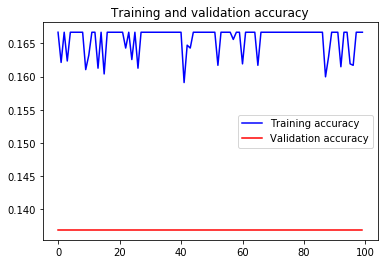

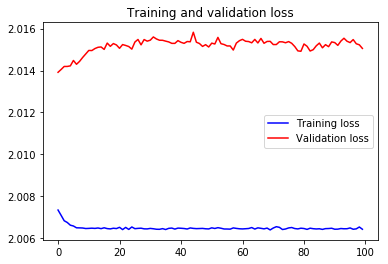

In [31]:
utils.model_curves(classifier)

In [32]:
scores = model.evaluate(X_test, y_test)
print("Score : %.2f%%" % (scores[1]*100))

1680/1680 [==============================] - 0s 24us/step
Score : 13.69%
